# Final Project - Logistic Regression
Logistic Regression for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

# Imports

In [67]:
# Importing the libraries to be used:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters

In [68]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1] - data[:, -1].min()
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y[y<=2] = 0.
    y[y==3] = 1.
    y[y>3] = 2.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print("The shape of the wines dataset:")
    print(data.shape)
    print(y[:10])
    print(X[:10, :])

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(X) # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


    return X_train, y_train, X_test, y_test

# Logistic Regression with Lasso (L1) Regularization

In [69]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # TODO - Create the Logistic Regression model object as described above and save it to logreg - 5 points
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # TODO - Fit the model on the training set - 5 points
    logreg.fit(X_train, y_train)

    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg.predict(X_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg.predict(X_test)

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

# Logistic Regression with Ridge(L2) Regularization.

In [70]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # TODO - Fit the model on the training set - 5 points
    logreg2.fit(X_train, Y_train)

    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg2.predict(X_test)

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

In [71]:
def train_and_plot(X_train, y_train, X_test, y_test):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    c_logreg = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    for c in c_logreg:
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = []
    c_logreg2 = c_logreg
    for c in c_logreg2:
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [72]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

In [73]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([ 10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(1599, 12)
[1. 0. 0. 0. 0. 0. 0. 1. 2. 0.]
[[7.9000e+00 4.0000e-01 3.0000e-01 1.8000e+00 1.5700e-01 2.0000e+00
  4.5000e+01 9.9727e-01 3.3100e+00 9.1000e-01 9.5000e+00]
 [7.9000e+00 7.2000e-01 1.0000e-02 1.9000e+00 7.6000e-02 7.0000e+00
  3.2000e+01 9.9668e-01 3.3900e+00 5.4000e-01 9.6000e+00]
 [1.2300e+01 5.0000e-01 4.9000e-01 2.2000e+00 8.9000e-02 5.0000e+00
  1.4000e+01 1.0002e+00 3.1900e+00 4.4000e-01 9.6000e+00]
 [7.1000e+00 4.6000e-01 1.4000e-01 2.8000e+00 7.6000e-02 1.5000e+01
  3.7000e+01 9.9624e-01 3.3600e+00 4.9000e-01 1.0700e+01]
 [7.1000e+00 4.3000e-01 4.2000e-01 5.5000e+00 7.0000e-02 2.9000e+01
  1.2900e+02 9.9730e-01 3.4200e+00 7.2000e-01 1.0500e+01]
 [9.9000e+00 6.3000e-01 2.4000e-01 2.4000e+00 7.7000e-02 6.0000e+00
  3.3000e+01 9.9740e-01 3.0900e+00 5.7000e-01 9.400

Accuracy on training data = 0.472367
Accuracy on test data = 0.454688
Accuracy on training data = 0.472367
Accuracy on test data = 0.454688
Accuracy on training data = 0.610010
Accuracy on test data = 0.560937
Accuracy on training data = 0.652763
Accuracy on test data = 0.595313
Accuracy on training data = 0.656934
Accuracy on test data = 0.601562
Accuracy on training data = 0.654849
Accuracy on test data = 0.603125


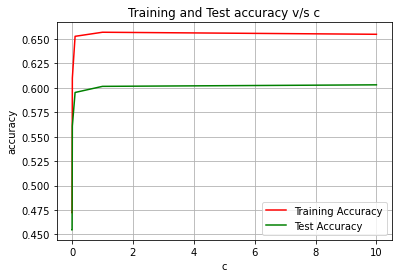

Accuracy on training data = 0.471324
Accuracy on test data = 0.454688
Accuracy on training data = 0.602711
Accuracy on test data = 0.567187
Accuracy on training data = 0.643379
Accuracy on test data = 0.584375
Accuracy on training data = 0.661105
Accuracy on test data = 0.601562
Accuracy on training data = 0.657977
Accuracy on test data = 0.601562
Accuracy on training data = 0.654849
Accuracy on test data = 0.601562


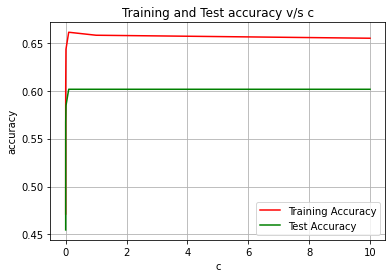

In [74]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.472367
Accuracy on test data = 0.454688
Accuracy on training data = 0.472367
Accuracy on test data = 0.454688
Accuracy on training data = 0.612096
Accuracy on test data = 0.564063
Accuracy on training data = 0.690302
Accuracy on test data = 0.590625
Accuracy on training data = 0.714286
Accuracy on test data = 0.590625
Accuracy on training data = 0.722628
Accuracy on test data = 0.595313


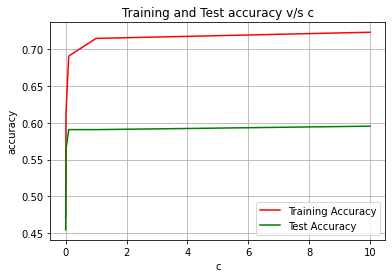

Accuracy on training data = 0.521376
Accuracy on test data = 0.487500
Accuracy on training data = 0.640250
Accuracy on test data = 0.560937
Accuracy on training data = 0.696559
Accuracy on test data = 0.603125
Accuracy on training data = 0.715328
Accuracy on test data = 0.593750
Accuracy on training data = 0.726799
Accuracy on test data = 0.601562
Accuracy on training data = 0.728884
Accuracy on test data = 0.601562


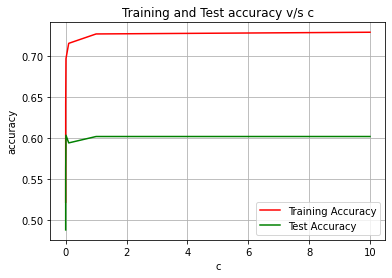

In [75]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

In [76]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([  20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6]))
Current y hist: (array([1640, 2198, 1060]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(4898, 12)
[2. 2. 1. 1. 1. 1. 1. 2. 1. 1.]
[[6.20000e+00 1.00000e-01 4.10000e-01 1.00000e+00 4.00000e-02 1.70000e+01
  7.60000e+01 9.89880e-01 3.14000e+00 5.60000e-01 1.14000e+01]
 [7.60000e+00 2.10000e-01 6.00000e-01 2.10000e+00 4.60000e-02 4.70000e+01
  1.65000e+02 9.93600e-01 3.05000e+00 5.40000e-01 1.01000e+01]
 [5.80000e+00 3.60000e-01 2.60000e-01 3.30000e+00 3.80000e-02 4.00000e+01
  1.53000e+02 9.91100e-01 3.34000e+00 5.50000e-01 1.13000e+01]
 [6.30000e+00 3.00000e-01 2.80000e-01 5.00000e+00 4.20000e-02 3.60000e+01
  1.68000e+02 9.95050e-01 3.22000e+00 6.90000e-01 9.50000e+00]
 [7.20000e+00 1.80000e-01 4.50000e-01 4.40000e+00 4.60000e-02 5.70000e+01
  1.66000e+02 9.94300e-01 3.13000e+00 6.20000e-01 1.12000e+01]
 [6.30000e+00 2.50000e-01 5.30000e-01 1.80000e+

Accuracy on training data = 0.441797
Accuracy on test data = 0.459184
Accuracy on training data = 0.441797
Accuracy on test data = 0.459184
Accuracy on training data = 0.552076
Accuracy on test data = 0.564286
Accuracy on training data = 0.572498
Accuracy on test data = 0.582653
Accuracy on training data = 0.569775
Accuracy on test data = 0.583163
Accuracy on training data = 0.572158
Accuracy on test data = 0.584184


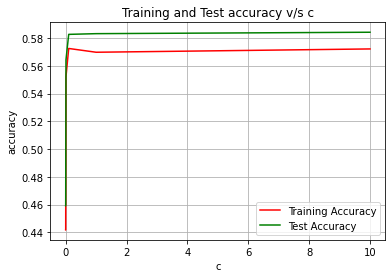

Accuracy on training data = 0.450987
Accuracy on test data = 0.466327
Accuracy on training data = 0.545950
Accuracy on test data = 0.547959
Accuracy on training data = 0.577944
Accuracy on test data = 0.577551
Accuracy on training data = 0.570456
Accuracy on test data = 0.581122
Accuracy on training data = 0.571477
Accuracy on test data = 0.583673
Accuracy on training data = 0.572498
Accuracy on test data = 0.584184


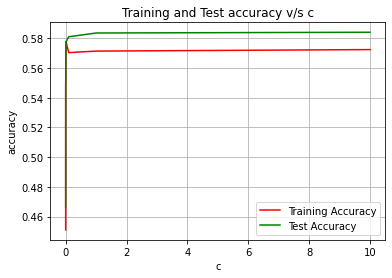

In [77]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.441797
Accuracy on test data = 0.459184
Accuracy on training data = 0.441797
Accuracy on test data = 0.459184
Accuracy on training data = 0.550715
Accuracy on test data = 0.571429
Accuracy on training data = 0.613683
Accuracy on test data = 0.614286
Accuracy on training data = 0.613683
Accuracy on test data = 0.602551
Accuracy on training data = 0.612321
Accuracy on test data = 0.597959


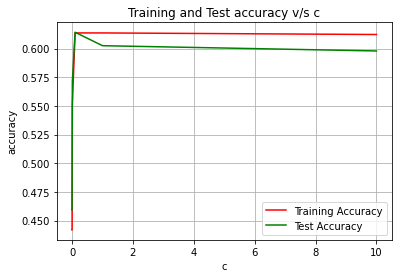

Accuracy on training data = 0.483662
Accuracy on test data = 0.495918
Accuracy on training data = 0.574200
Accuracy on test data = 0.584694
Accuracy on training data = 0.609939
Accuracy on test data = 0.606122
Accuracy on training data = 0.615385
Accuracy on test data = 0.595918
Accuracy on training data = 0.615725
Accuracy on test data = 0.591327
Accuracy on training data = 0.617767
Accuracy on test data = 0.592347


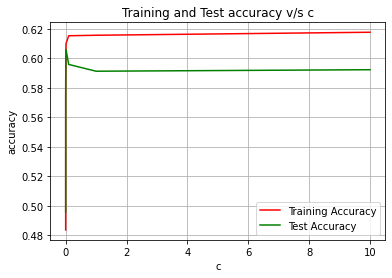

In [78]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

In [79]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([  30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6]))
Current y hist: (array([2384, 2836, 1277]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset:
(6497, 12)
[1. 1. 1. 1. 0. 1. 0. 1. 2. 1.]
[[6.3000e+00 6.7000e-01 4.8000e-01 1.2600e+01 5.2000e-02 5.7000e+01
  2.2200e+02 9.9790e-01 3.1700e+00 5.2000e-01 9.3000e+00]
 [6.0000e+00 2.0000e-01 2.6000e-01 6.8000e+00 4.9000e-02 2.2000e+01
  9.3000e+01 9.9280e-01 3.1500e+00 4.2000e-01 1.1000e+01]
 [6.7000e+00 1.5000e-01 3.2000e-01 7.9000e+00 3.4000e-02 1.7000e+01
  8.1000e+01 9.9512e-01 3.2900e+00 3.1000e-01 1.0000e+01]
 [7.4000e+00 6.8000e-01 1.6000e-01 1.8000e+00 7.8000e-02 1.2000e+01
  3.9000e+01 9.9770e-01 3.5000e+00 7.0000e-01 9.9000e+00]
 [7.8000e+00 4.9000e-01 4.9000e-01 7.0000e+00 4.3000e-02 2.9000e+01
  1.4900e+02 9.9520e-01 3.2100e+00 3.3000e-01 1.0000e+01]
 [6.4000e+00 1.9000e-01 3.5000e-01 1.0200e+01 4.3000e-02 4.0000e+01
  1.0600e+02 9.9632e-01 3.1600e+00

Accuracy on training data = 0.438943
Accuracy on test data = 0.432859
Accuracy on training data = 0.438943
Accuracy on test data = 0.432859
Accuracy on training data = 0.564392
Accuracy on test data = 0.550212
Accuracy on training data = 0.590559
Accuracy on test data = 0.565217
Accuracy on training data = 0.590046
Accuracy on test data = 0.565217
Accuracy on training data = 0.591329
Accuracy on test data = 0.567141


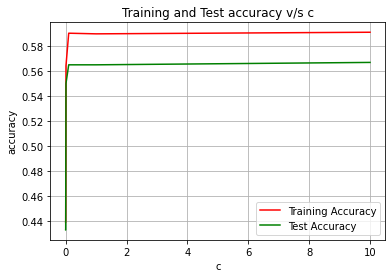

Accuracy on training data = 0.493073
Accuracy on test data = 0.475568
Accuracy on training data = 0.557722
Accuracy on test data = 0.534821
Accuracy on training data = 0.591072
Accuracy on test data = 0.560985
Accuracy on training data = 0.588507
Accuracy on test data = 0.564833
Accuracy on training data = 0.590816
Accuracy on test data = 0.566372
Accuracy on training data = 0.591072
Accuracy on test data = 0.566756


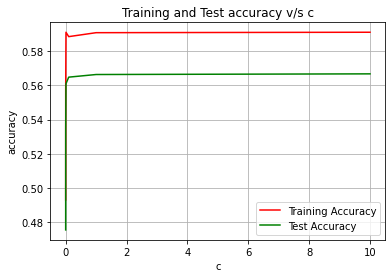

In [80]:
train_and_plot(X_train, y_train, X_test, y_test)

Accuracy on training data = 0.438943
Accuracy on test data = 0.432859
Accuracy on training data = 0.438943
Accuracy on test data = 0.432859
Accuracy on training data = 0.572601
Accuracy on test data = 0.552520
Accuracy on training data = 0.610826
Accuracy on test data = 0.587149
Accuracy on training data = 0.615700
Accuracy on test data = 0.594459
Accuracy on training data = 0.614418
Accuracy on test data = 0.598692


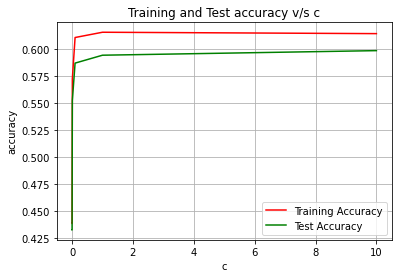

Accuracy on training data = 0.506927
Accuracy on test data = 0.482493
Accuracy on training data = 0.589533
Accuracy on test data = 0.557522
Accuracy on training data = 0.611083
Accuracy on test data = 0.587534
Accuracy on training data = 0.614418
Accuracy on test data = 0.598307
Accuracy on training data = 0.617240
Accuracy on test data = 0.599461
Accuracy on training data = 0.617753
Accuracy on test data = 0.597922


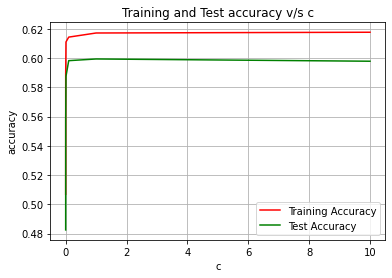

In [81]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test)

# Logistic Regression Using Polynomial Feature Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html